# Exploratory Data Analysis for PolicyAnalyzAI

In [34]:
# Import essential libraries for EDA
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import textstat
%matplotlib inline

In [35]:
# Load the consolidated JSON dataset
data_path = '../data/processed/consolidated_data.json'
with open(data_path, 'r', encoding='utf-8') as file:
    consolidated_data = json.load(file)

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(consolidated_data)
df.to_csv('../output/loaded_data.csv', index=False)
print('✅ Data loaded and saved to loaded_data.csv')

✅ Data loaded and saved to loaded_data.csv


In [36]:
# Overview of the dataset
print('Dataset Overview:\n')
df.info()

# Add content length and word count
df['content_length'] = df['cleaned_content'].apply(len)
df['word_count'] = df['cleaned_content'].apply(lambda x: len(x.split()))
df.describe().to_csv('../output/dataset_overview.csv')
print('✅ Dataset overview saved to dataset_overview.csv')

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            177 non-null    object
 1   url              177 non-null    object
 2   cleaned_content  177 non-null    object
 3   word_tokens      177 non-null    object
 4   sentence_tokens  177 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB
✅ Dataset overview saved to dataset_overview.csv


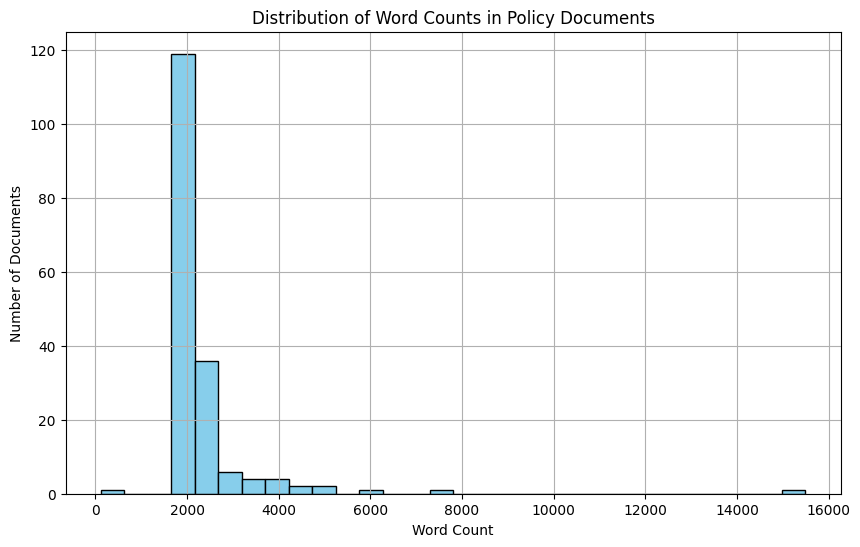

✅ Word count distribution plot saved as word_count_distribution.png


In [37]:
# Plot the distribution of word counts in policies
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Policy Documents')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')
plt.grid(True)
plt.savefig('../output/word_count_distribution.png')
plt.show()
print('✅ Word count distribution plot saved as word_count_distribution.png')

✅ Top common words saved to top_common_words.csv


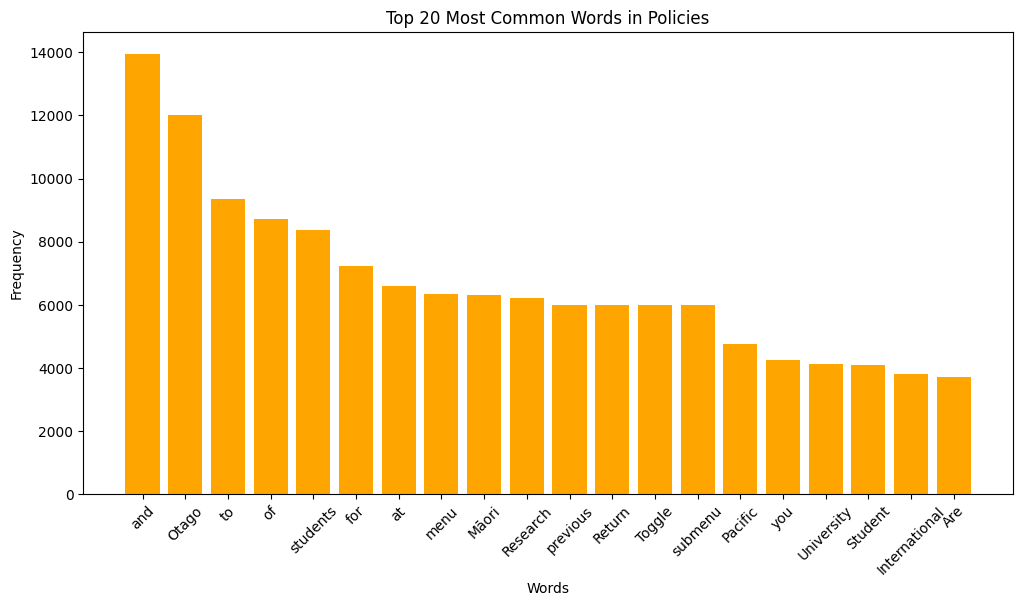

✅ Common words plot saved as common_words_plot.png


In [38]:
# Combine all text for frequency analysis
all_text = ' '.join(df['cleaned_content'])
word_counts = Counter(all_text.split())
common_words = word_counts.most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df.to_csv('../output/top_common_words.csv', index=False)
print('✅ Top common words saved to top_common_words.csv')

# Plot the top 20 most common words
plt.figure(figsize=(12, 6))
plt.bar(common_words_df['Word'], common_words_df['Frequency'], color='orange')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Policies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.savefig('../output/common_words_plot.png')
plt.show()
print('✅ Common words plot saved as common_words_plot.png')

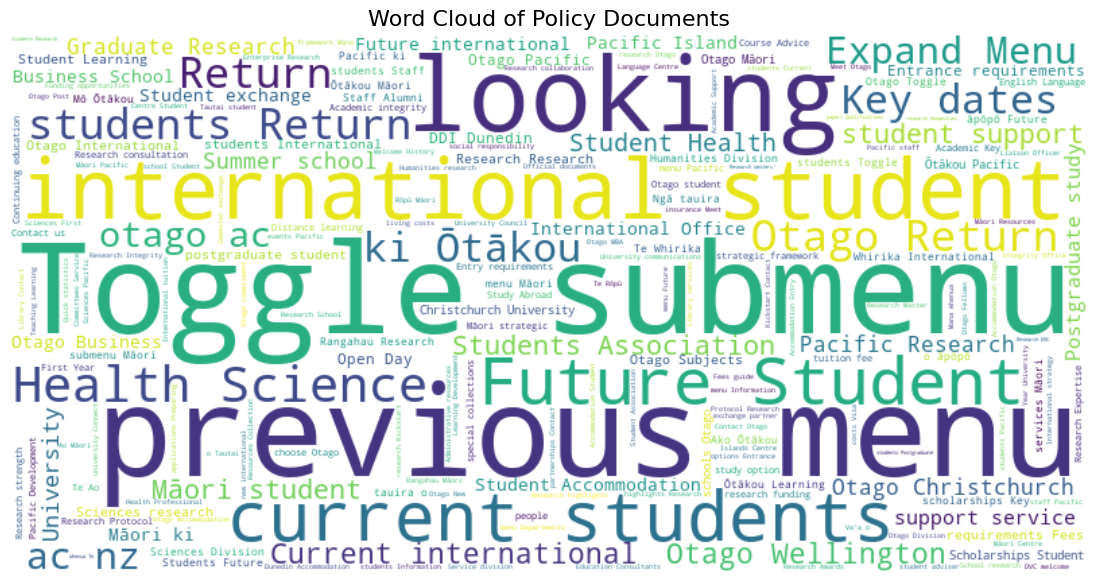

✅ Word cloud saved as word_cloud.png


In [39]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Documents', fontsize=16)
plt.savefig('../output/word_cloud.png')
plt.show()
print('✅ Word cloud saved as word_cloud.png')

✅ K-Means clusters saved to kmeans_clusters.csv


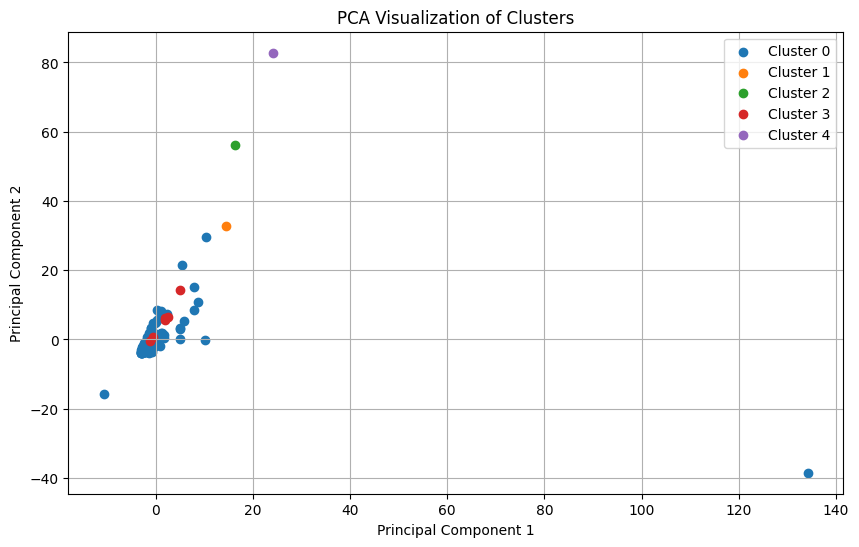

✅ PCA cluster visualization saved as pca_clusters.png


In [40]:
# Perform K-Means Clustering
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_content']).toarray()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
df[['title', 'Cluster']].to_csv('../output/kmeans_clusters.csv', index=False)
print('✅ K-Means clusters saved to kmeans_clusters.csv')

# Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('../output/pca_clusters.png')
plt.show()
print('✅ PCA cluster visualization saved as pca_clusters.png')

✅ Top longest policies saved to top_longest_policies.csv


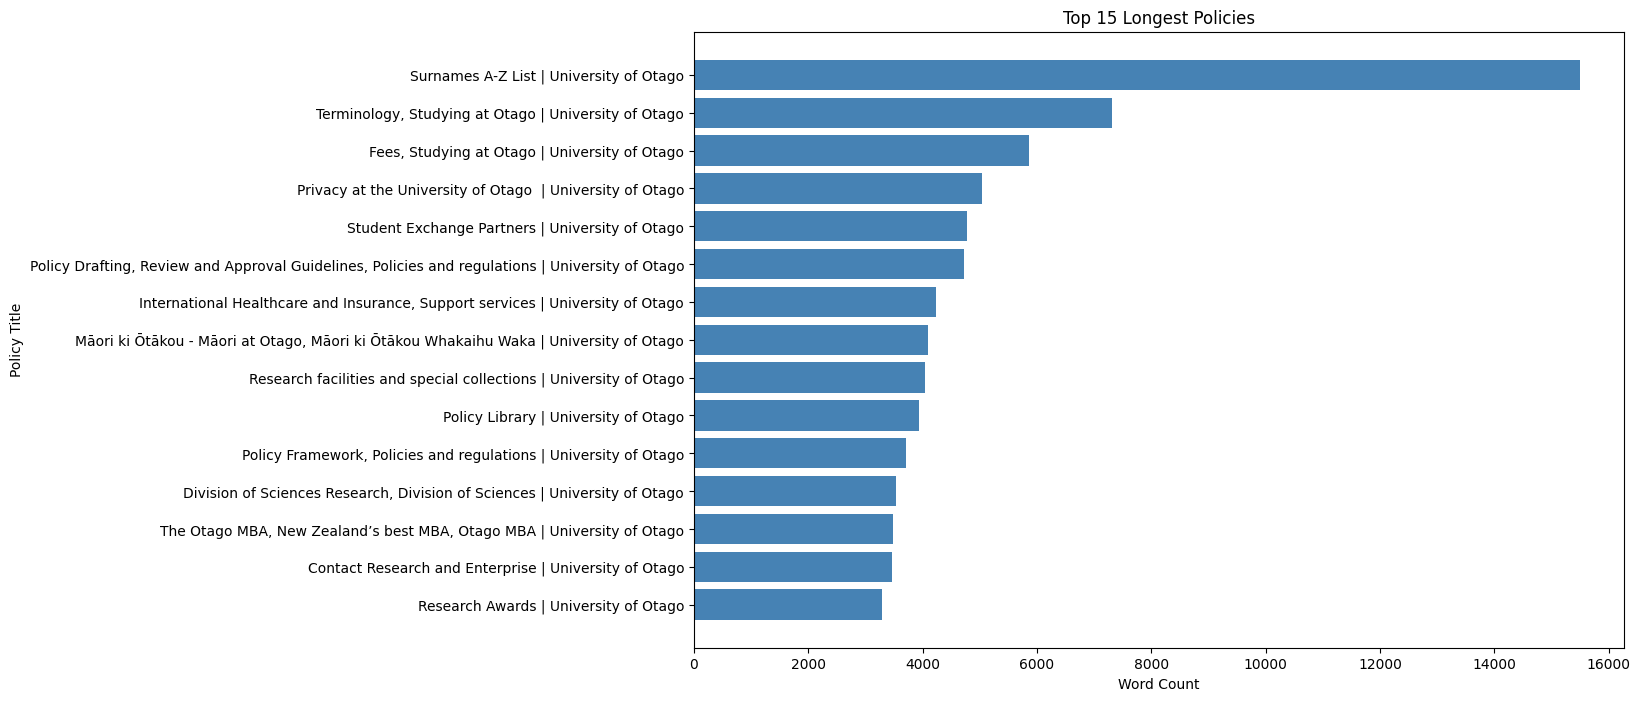

✅ Plot of top longest policies saved as top_longest_policies.png


In [41]:
# Display top 15 longest policies
top_longest = df.sort_values(by='word_count', ascending=False).head(15)
top_longest.to_csv('../output/top_longest_policies.csv', index=False)
print('✅ Top longest policies saved to top_longest_policies.csv')

plt.figure(figsize=(12, 8))
plt.barh(top_longest['title'], top_longest['word_count'], color='steelblue')
plt.xlabel('Word Count')
plt.ylabel('Policy Title')
plt.title('Top 15 Longest Policies')
plt.gca().invert_yaxis()
plt.savefig('../output/top_longest_policies.png')
plt.show()
print('✅ Plot of top longest policies saved as top_longest_policies.png')

✅ Readability scores saved to readability_scores.csv


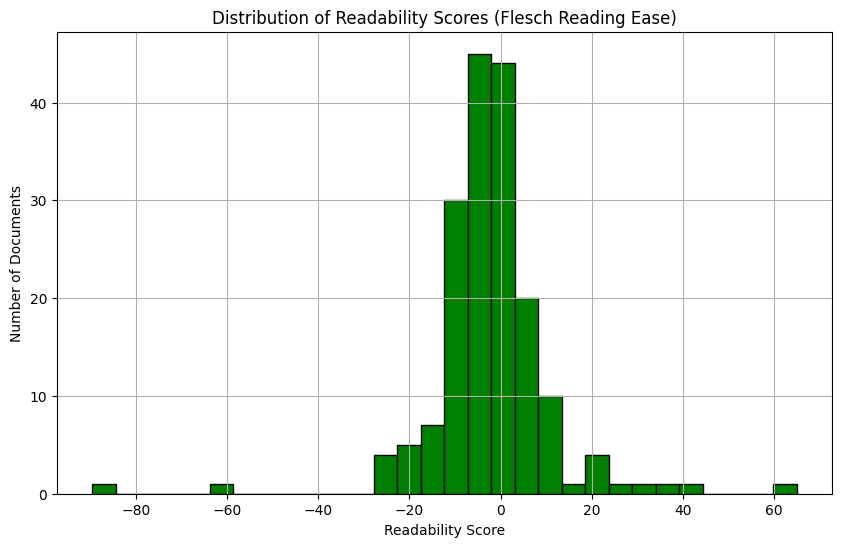

✅ Readability score distribution plot saved as readability_scores_distribution.png


In [42]:
# Calculate readability scores
df['readability_score'] = df['cleaned_content'].apply(lambda x: textstat.flesch_reading_ease(x))
df[['title', 'readability_score']].to_csv('../output/readability_scores.csv', index=False)
print('✅ Readability scores saved to readability_scores.csv')

plt.figure(figsize=(10, 6))
plt.hist(df['readability_score'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Readability Scores (Flesch Reading Ease)')
plt.xlabel('Readability Score')
plt.ylabel('Number of Documents')
plt.grid(True)
plt.savefig('../output/readability_scores_distribution.png')
plt.show()
print('✅ Readability score distribution plot saved as readability_scores_distribution.png')

✅ Top bigrams saved to top_bigrams.csv


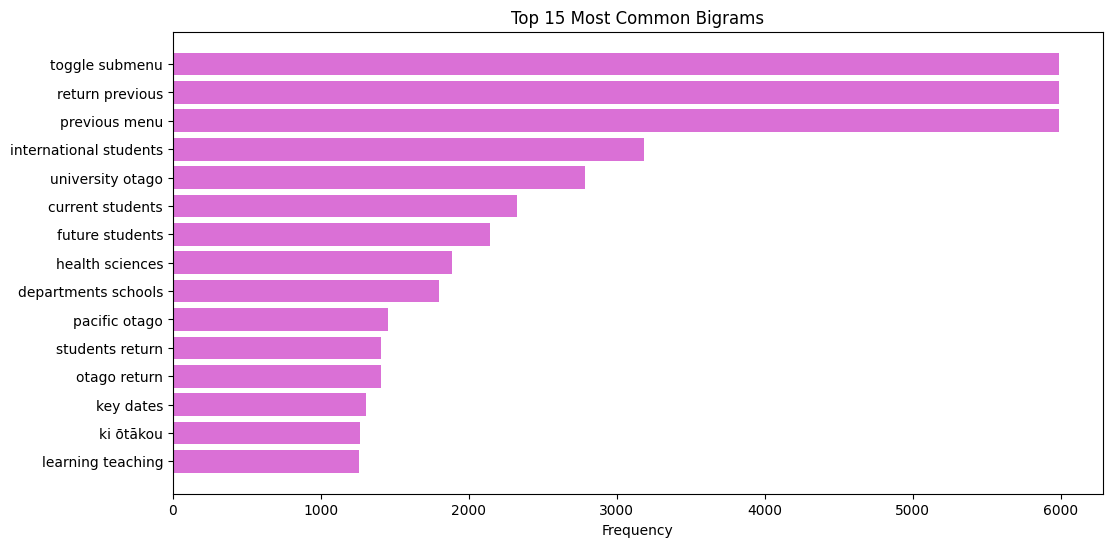

✅ Top bigrams plot saved as top_bigrams.png


In [43]:
# Generate top bigrams
def get_top_n_grams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 15 bigrams
top_bigrams = get_top_n_grams(df['cleaned_content'], ngram_range=(2, 2), n=15)
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
bigram_df.to_csv('../output/top_bigrams.csv', index=False)
print('✅ Top bigrams saved to top_bigrams.csv')

# Plot top bigrams
plt.figure(figsize=(12, 6))
plt.barh(bigram_df['Bigram'], bigram_df['Frequency'], color='orchid')
plt.xlabel('Frequency')
plt.title('Top 15 Most Common Bigrams')
plt.gca().invert_yaxis()
plt.savefig('../output/top_bigrams.png')
plt.show()
print('✅ Top bigrams plot saved as top_bigrams.png')